### 1. 將資料集讀取為 DataFrame 格式，並將原始順序打亂

#### 1.1 讀取資料

In [1]:
import pandas as pd 
df = pd.read_csv("gender_recog.csv")
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


### 1.2 檢查資料缺失與資料類別

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

#### 1.3 將 DataFrame 內的資料打散

(從 index 可以觀察到順序全部被打亂，每次 shuffle 都會不一樣)

In [3]:
from sklearn.utils import shuffle
df_shuffle = shuffle(df)
df_shuffle

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1490,0.144257,0.077591,0.133869,0.091800,0.212384,0.120584,1.818314,6.202949,0.951253,0.677043,...,0.144257,0.118050,0.022191,0.271186,0.416835,0.007812,1.742188,1.734375,0.150901,male
1446,0.175394,0.059282,0.176817,0.125952,0.216540,0.090588,1.331486,5.078664,0.924514,0.433632,...,0.175394,0.116505,0.053333,0.275862,1.022461,0.023438,15.796875,15.773438,0.063170,male
1147,0.191583,0.057748,0.203681,0.139752,0.240354,0.100602,1.101606,3.455071,0.905459,0.322392,...,0.191583,0.127910,0.047105,0.272727,1.850361,0.023438,8.953125,8.929688,0.131801,male
1927,0.139305,0.112649,0.194216,0.000229,0.236536,0.236307,27.592899,810.449203,0.738651,0.276171,...,0.139305,0.175442,0.017094,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,female
1398,0.204770,0.057290,0.232608,0.145561,0.253886,0.108325,1.579556,5.335374,0.883213,0.254528,...,0.204770,0.123878,0.048731,0.279070,0.952083,0.023438,9.117188,9.093750,0.085989,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,0.158781,0.059852,0.147013,0.107879,0.216797,0.108918,3.648593,20.799925,0.898225,0.401169,...,0.158781,0.115299,0.079365,0.250000,0.460938,0.087891,0.786133,0.698242,0.552115,male
312,0.161386,0.062620,0.167880,0.107507,0.214212,0.106705,3.682161,18.420168,0.897276,0.482138,...,0.161386,0.114010,0.042735,0.270270,0.551536,0.004883,0.742188,0.737305,0.337748,male
672,0.152186,0.063314,0.156973,0.096143,0.201855,0.105712,3.063665,13.483005,0.893313,0.424896,...,0.152186,0.097133,0.038760,0.263158,0.511068,0.092773,0.751953,0.659180,0.684444,male
88,0.193808,0.054969,0.202233,0.152485,0.241116,0.088632,4.057909,44.447039,0.914800,0.299863,...,0.193808,0.083128,0.016260,0.250000,0.230183,0.007812,1.984375,1.976562,0.116996,male


### 2. 使用 scikit learn 建立 RandomForest 分類器 ，並以 10 cross validation 評估模型在此資料集的分類表現

**(不特別調整模型參數的版本)**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

X = df_shuffle.drop(['label'], axis=1)
y = df_shuffle['label']

#定義交叉驗證方法
cv = KFold(n_splits=10,shuffle=True)

#定義 f1 score 要以哪一種類別做為判斷依據
f1_scorer = make_scorer(f1_score, pos_label="female")

# 建立 RandomForest 分類器
clf = RandomForestClassifier(random_state=0)

#使用 k-fold 交叉驗證評估
scores1 = cross_val_score(clf, X, y, scoring=f1_scorer,cv=cv)

#印出平均的 f1 score
print("Random Forest 平均的 F1-score: "+str(scores1.mean()))

Random Forest 平均的 F1-score: 0.9799210894055033


array([0.02221313, 0.07728828, 0.0161344 , 0.13620247, 0.00923206,
       0.20808303, 0.01393315, 0.00764218, 0.03532114, 0.02530214,
       0.01382501, 0.02047878, 0.36391691, 0.00945829, 0.00388268,
       0.00749717, 0.00682164, 0.00939409, 0.00718225, 0.0061912 ])

### 8. 哪一個屬性 在 RandomForest 的分類中 最重要

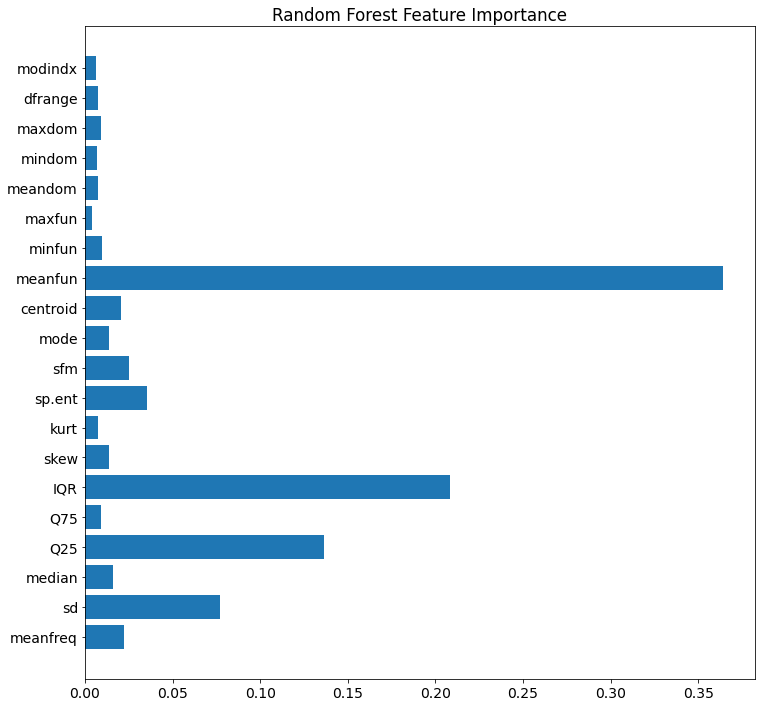

In [43]:
import matplotlib.pyplot as plt

names = []
for feature_name in df.columns:
    names.append(feature_name)
names.remove("label")

clf.fit(X,y)

plt.rc('font', size=14)
plt.figure(figsize=(12,12))
plt.barh(names, clf.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()